<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

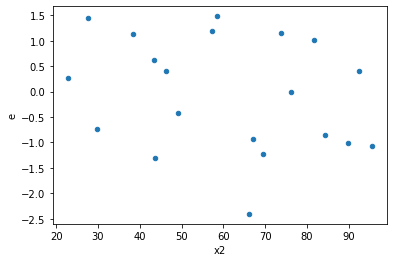

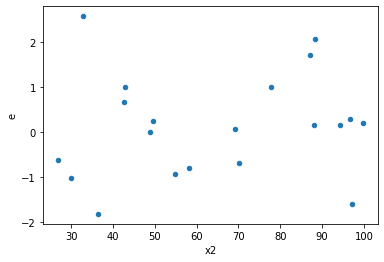

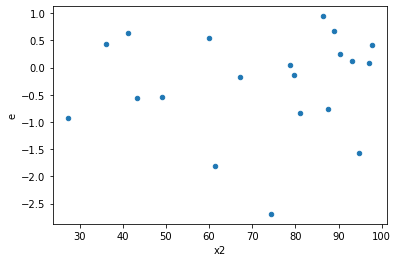

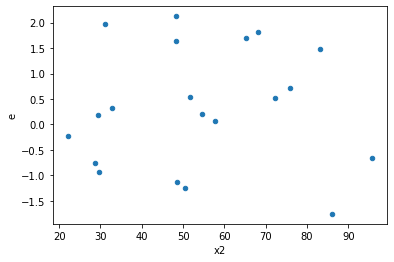

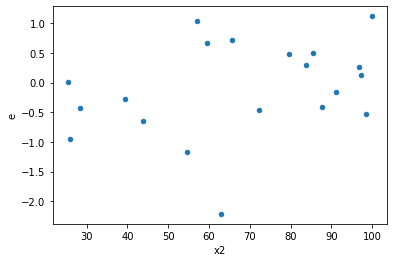

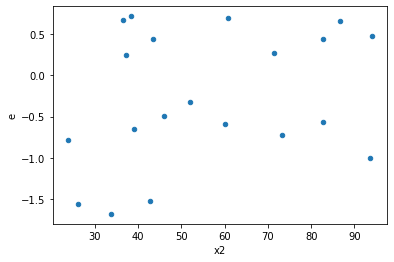

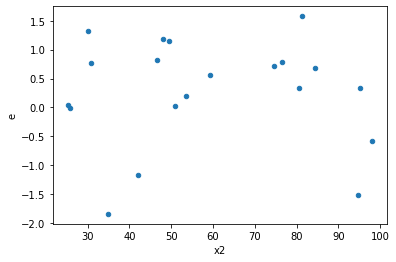

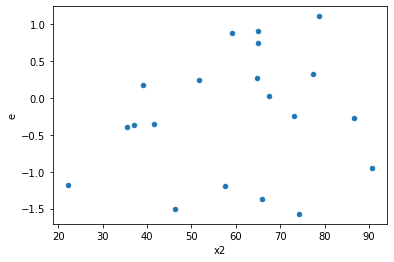

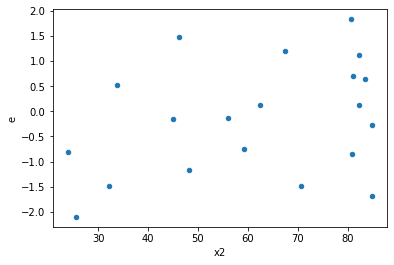

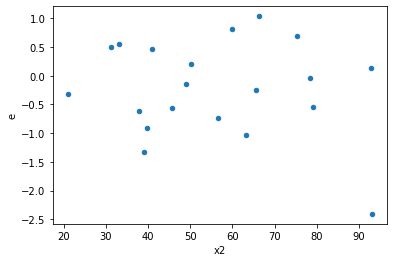

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,5.7543920714199475,6.285465452203224,0.9590653452366579,1.0475775753672039,1.0922900932352058,0.9174017024409422,0.5412991487795289,0.4587008512204711,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,4.958009689074963,8.251406811832005,0.8263349481791605,1.3752344686386675,1.6642579037338479,0.5515328794385534,0.7242335602807233,0.2757664397192767,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,5.977871561794679,8.462856742953585,0.9963119269657797,1.4104761238255976,1.4156973189321693,0.68365984229559,0.658170078852205,0.341829921147795,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,6.466005075136896,7.057365332777136,1.077667512522816,1.176227555462856,1.0914568192830751,0.9181130326084896,0.5409434836957552,0.4590565163042448,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.3829195324950942,7.350560796342073,0.0638199220825157,1.225093466057012,19.19609780270544,0.0022511304713925817,0.9988744347643037,0.0011255652356962909,Reject001=0 : Heteroscedasticity
7.0,6.0,6.0,2.4285383267384897,3.3672754862044547,0.40475638778974826,0.5612125810340758,1.3865440990287696,0.7015792195701,0.64921039021495,0.35078960978505,Reject001=1 : Homoscedasticity
9.0,6.0,6.0,1.547293058725164,5.134872918686812,0.25788217645419403,0.8558121531144686,3.318616915994894,0.1700526510822289,0.9149736744588856,0.08502632554111444,Reject001=1 : Homoscedasticity
10.0,6.0,6.0,6.936874277190616,7.680661712360404,1.1561457128651027,1.2801102853934008,1.1072222741034046,0.904758494605487,0.5476207526972565,0.4523792473027435,Reject001=1 : Homoscedasticity
12.0,6.0,6.0,3.2846386342929956,5.663740779910049,0.5474397723821659,0.9439567966516749,1.7243116855468472,0.5244881042851348,0.7377559478574326,0.2622440521425674,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,5.7543920714199475,6.285465452203224,0.9590653452366579,1.0475775753672039,1.0922900932352058,0.9174017024409422,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,4.958009689074963,8.251406811832005,0.8263349481791605,1.3752344686386675,1.6642579037338479,0.5515328794385534,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,5.977871561794679,8.462856742953585,0.9963119269657797,1.4104761238255976,1.4156973189321693,0.68365984229559,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,6.466005075136896,7.057365332777136,1.077667512522816,1.176227555462856,1.0914568192830751,0.9181130326084896,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.3829195324950942,7.350560796342073,0.0638199220825157,1.225093466057012,19.19609780270544,0.0022511304713925817,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,3.643523936463785,2.689259126021317,0.6072539894106308,0.44820985433688615,0.7380928938349098,0.7217106467968064,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,4.419343852796424,2.9869826041606355,0.7365573087994041,0.4978304340267726,0.6758882548300841,0.6463210745568188,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,2.4285383267384897,3.3672754862044547,0.40475638778974826,0.5612125810340758,1.3865440990287696,0.7015792195701,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,8.918535054768432,6.955881055336419,1.486422509128072,1.1593135092227365,0.7799353831790289,0.7705334830647517,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      980
Reject001=0 : Heteroscedasticity     20
Name: Result_test, dtype: int64